In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display basic information about each dataset
print("Customers Dataset:")
print(customers.info())
print(customers.head())

print("\nProducts Dataset:")
print(products.info())
print(products.head())

print("\nTransactions Dataset:")
print(transactions.info())
print(transactions.head())

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID

In [3]:
# Merge datasets for unified analysis
merged_df = transactions.merge(customers, on="CustomerID", how="left")
merged_df = merged_df.merge(products, on="ProductID", how="left")

In [4]:
# Display merged dataset summary
print("\nMerged Dataset:")
print(merged_df.info())
print(merged_df.head())

# Check for missing values
print("\nMissing Values:")
print(merged_df.isnull().sum())

# Descriptive statistics
print("\nSummary Statistics:")
print(merged_df.describe())


Merged Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-2

##   EDA and Visualization 

### 1. Customer Analysis

In [5]:
# Total number of customers
total_customers = customers["CustomerID"].nunique()
print(f"\nTotal Customers: {total_customers}")


Total Customers: 200



Customers by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


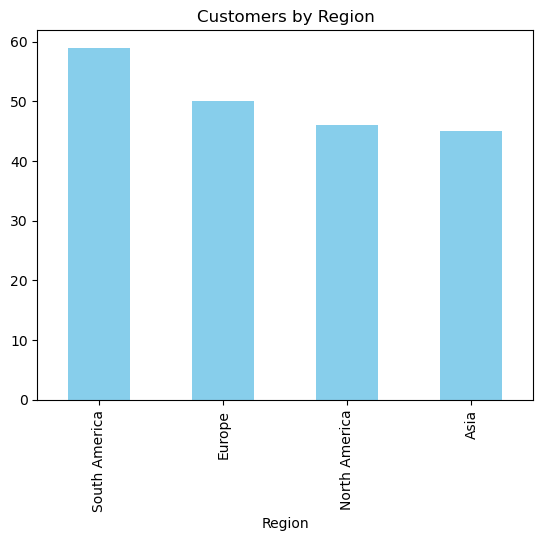

In [6]:
# Customers by region
customers_by_region = customers["Region"].value_counts()
print("\nCustomers by Region:")
print(customers_by_region)
customers_by_region.plot(kind="bar", title="Customers by Region", color="skyblue")
plt.show()

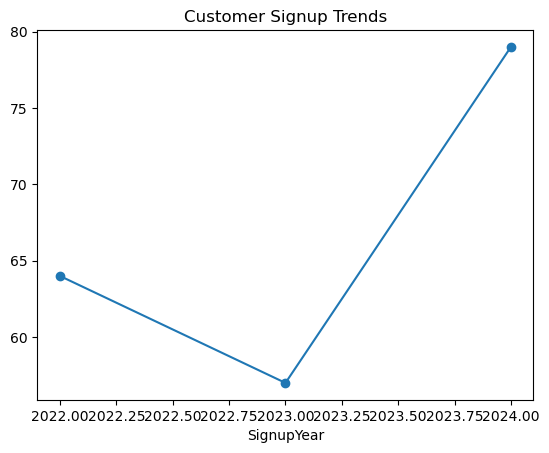

In [7]:
# Signup trends
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
customers["SignupYear"] = customers["SignupDate"].dt.year
signup_trends = customers["SignupYear"].value_counts().sort_index()
signup_trends.plot(kind="line", title="Customer Signup Trends", marker="o")
plt.show()

### 2. Product Analysis


Top-Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


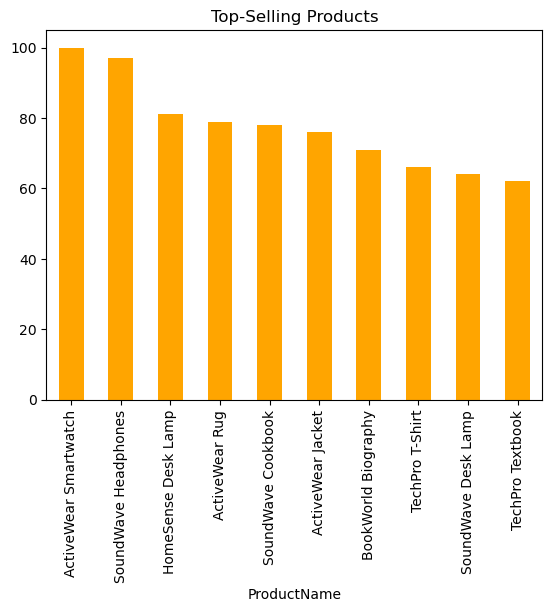

In [8]:
# Top-selling products
top_products = merged_df.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
print("\nTop-Selling Products:")
print(top_products)
top_products.plot(kind="bar", title="Top-Selling Products", color="orange")
plt.show()


Revenue by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


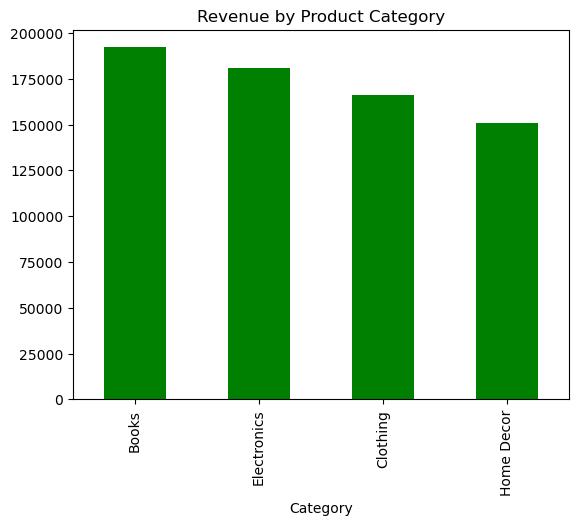

In [9]:
# Revenue by product category
revenue_by_category = merged_df.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print("\nRevenue by Product Category:")
print(revenue_by_category)
revenue_by_category.plot(kind="bar", title="Revenue by Product Category", color="green")
plt.show()

### 3. Transaction Analysis

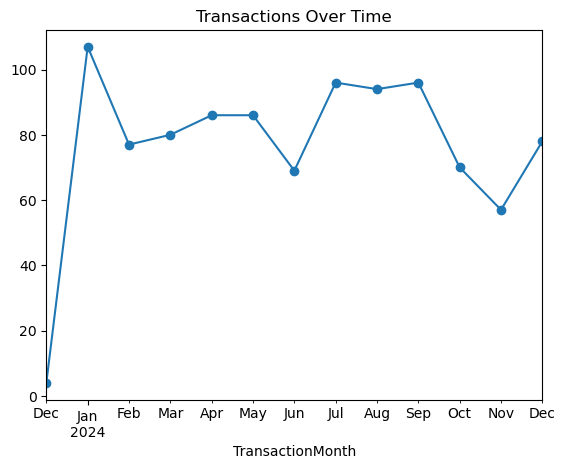

In [10]:

# Transactions over time
merged_df["TransactionDate"] = pd.to_datetime(merged_df["TransactionDate"])
merged_df["TransactionMonth"] = merged_df["TransactionDate"].dt.to_period("M")
transactions_over_time = merged_df["TransactionMonth"].value_counts().sort_index()
transactions_over_time.plot(kind="line", title="Transactions Over Time", marker="o")
plt.show()

In [11]:
# Average transaction value
avg_transaction_value = merged_df["TotalValue"].mean()
print(f"\nAverage Transaction Value: ${avg_transaction_value:.2f}")


Average Transaction Value: $690.00


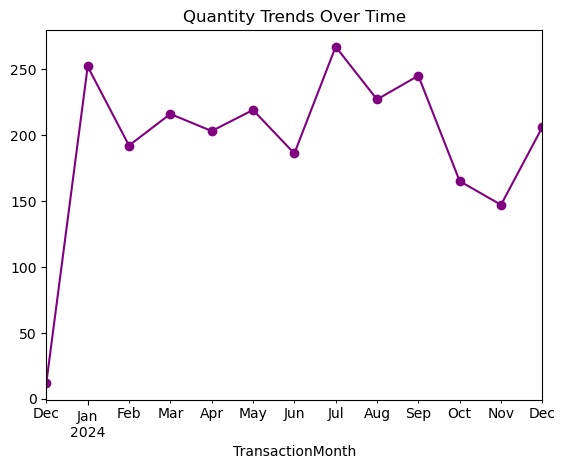

In [12]:
# Quantity trends
quantity_trends = merged_df.groupby("TransactionMonth")["Quantity"].sum()
quantity_trends.plot(kind="line", title="Quantity Trends Over Time", marker="o", color="purple")
plt.show()

### 4. Region-Specific Insights


Regional Revenue Distribution:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


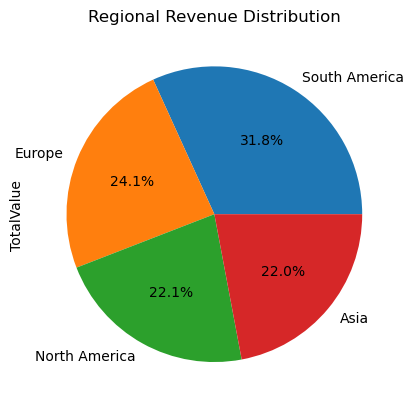

In [13]:
# Regional revenue distribution
region_revenue = merged_df.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("\nRegional Revenue Distribution:")
print(region_revenue)
region_revenue.plot(kind="pie", title="Regional Revenue Distribution", autopct="%1.1f%%")
plt.show()

### 5. Outlier Detection

In [14]:
# High-value transactions
high_value_transactions = merged_df[merged_df["TotalValue"] > merged_df["TotalValue"].quantile(0.95)]
print("\nHigh-Value Transactions (Top 5%):")
print(high_value_transactions)


High-Value Transactions (Top 5%):
    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
74         T00007      C0173      P023 2024-05-06 18:05:22         4   
82         T00997      C0164      P023 2024-11-01 23:04:56         4   
118        T00012      C0091      P041 2024-03-29 01:28:17         4   
119        T00034      C0168      P041 2024-01-09 11:00:50         4   
120        T00094      C0012      P041 2024-07-14 19:37:54         4   
125        T00482      C0066      P041 2024-06-04 02:02:24         4   
181        T00020      C0153      P007 2024-07-16 22:33:47         4   
182        T00163      C0101      P007 2024-03-13 22:33:34         4   
262        T00069      C0021      P086 2024-01-13 00:48:20         4   
263        T00193      C0041      P086 2024-06-10 11:46:13         4   
264        T00420      C0057      P086 2024-07-31 21:34:31         4   
265        T00493      C0126      P086 2024-11-28 19:01:58         4   
266        T00587      C0165 